# Network science

## Structure of interactions and different models of ecological network

Contributers: Nguyen Xuan Tung/ Farin Binta Zahir

## Analysis the network

In [38]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import collections
import itertools
import numpy as np
import community
import time
from numpy.linalg import eig
import seaborn as sns
import scipy.linalg as la
import matplotlib.ticker as ticker
import snap

In [100]:
attr = pd.read_csv('FW_002-species.csv')
attr

,Specie,Kingdom,Role,Degree,Sum(connections strength),Networks presence
0,Astyanax altiparanae,Animals,Prey,2,1.2400,3
1,Astyanax altiparanae,Animals,Predator,5,0.9996,3
2,Astyanax fasciatus,Animals,Predator,4,1.0000,1
3,Astyanax fasciatus,Animals,Prey,2,0.1600,1
4,Brycon nattereri,Animals,Prey,1,0.1150,1
5,Brycon nattereri,Animals,Predator,5,1.0010,1
6,Hoplias malabaricus,Animals,Prey,1,0.0300,5
7,Hoplias malabaricus,Animals,Predator,7,1.0000,5
8,Hypostomus strigaticeps,Animals,Prey,1,0.0100,1
9,Hypostomus strigaticeps,Animals,Predator,1,1.0000,1


In [101]:
name = attr['Specie'].tolist()
group = attr['Role'].tolist()
G = nx.read_edgelist('FW_002.txt', create_using=nx.DiGraph())

dict_color = {}
cnt = 0
for i in set(group):
    dict_color[i] = cnt
    cnt = cnt + 1
    
node_colors = []
for v in G.nodes():
    G.nodes[v]['Specie'] = name[int(v)]
    G.nodes[v]['Role'] = group[int(v)]
    node_colors.append(dict_color[group[int(v)]])

In [102]:
#nx.write_gml(G, 'gephi.gml')
label = {}
node_color = []
for nodes in G.nodes():
    label[nodes] = G.nodes[nodes]['Specie']

<function matplotlib.pyplot.show(close=None, block=None)>

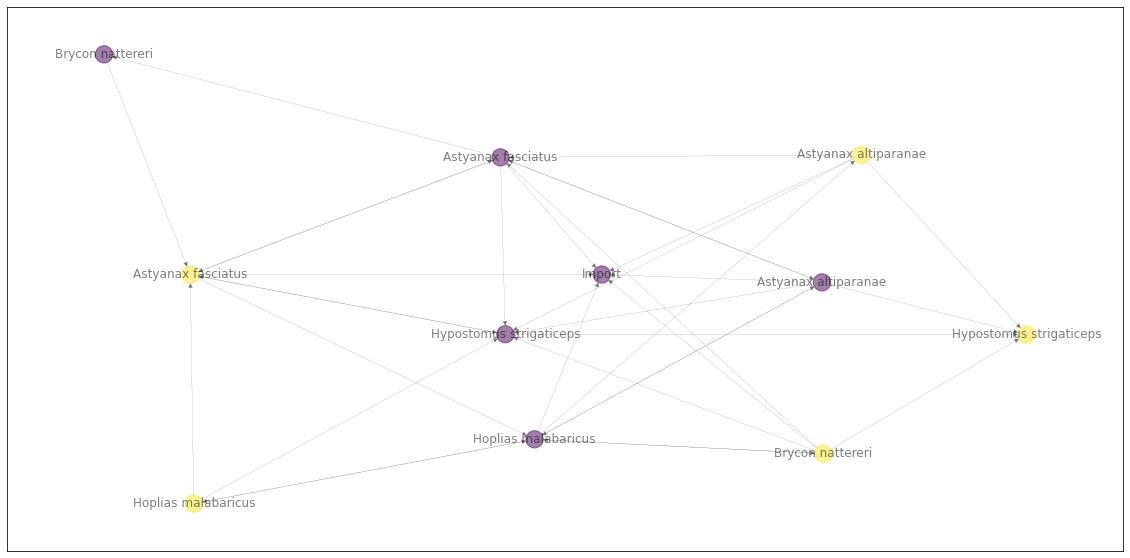

In [103]:
plt.figure(figsize=[20,10])
nx.draw_networkx(G, pos=nx.kamada_kawai_layout(G), node_color = node_colors, 
                 width=0.2, alpha=0.5, labels=label, with_labels=True)
plt.show

In [104]:
print('Order of the network is: ' + str(len(G.nodes())))
print('Size of the network is: ' + str(len(G.edges())))

Order of the network is: 11
Size of the network is: 36


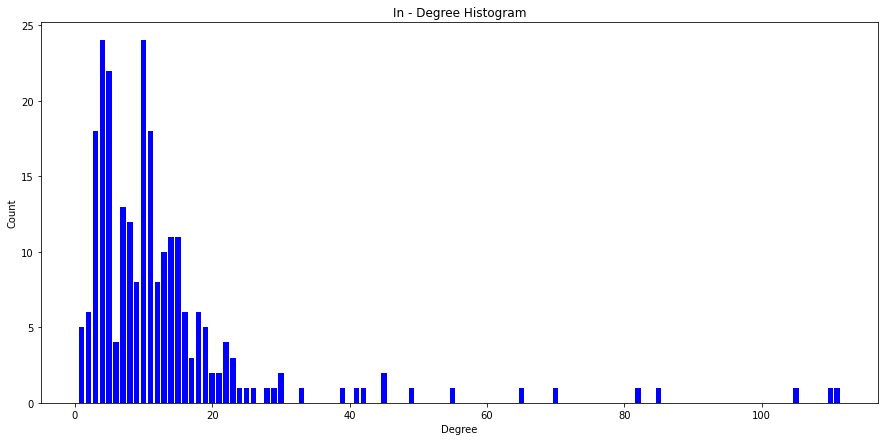

In [88]:
degree_sequence = sorted([d for n, d in G.in_degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=[15,7])
plt.bar(deg, cnt, width=0.8, color='b')

plt.title("In - Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
#ax.set_xticks([d for d in deg])
#ax.set_xticklabels(deg)
plt.show()

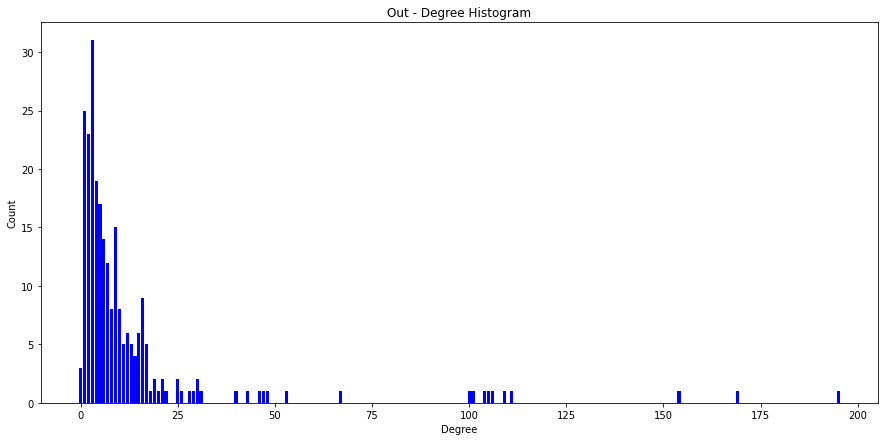

In [89]:
degree_sequence = sorted([d for n, d in G.out_degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=[15,7])
plt.bar(deg, cnt, width=0.8, color='b')

plt.title("Out - Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
#ax.set_xticks([d for d in deg])
#ax.set_xticklabels(deg)
plt.show()

The out-degree and in-degree of each species represent correspondingly the vulnerability (number of predators) and generality (number of resources). Both the distributions follow the power law.

----------------------------------------------------------------------------------------------------------

Structures formed by groups of multiple nodes can beanalyzed by looking at what types of relationships the nodes (representing a species) are typically embeddeding (e.g.competition,intraguild predation - intraguild predation is the killing and sometimes eating of potential competitors. This interaction represents a combination of predation and competition, because both species relyon the same prey resources and also benefit from preyingupon one another), by determining if there are nodes found in dense clusters or non-overlapping compartments,forming modular communities or using motif distribution.

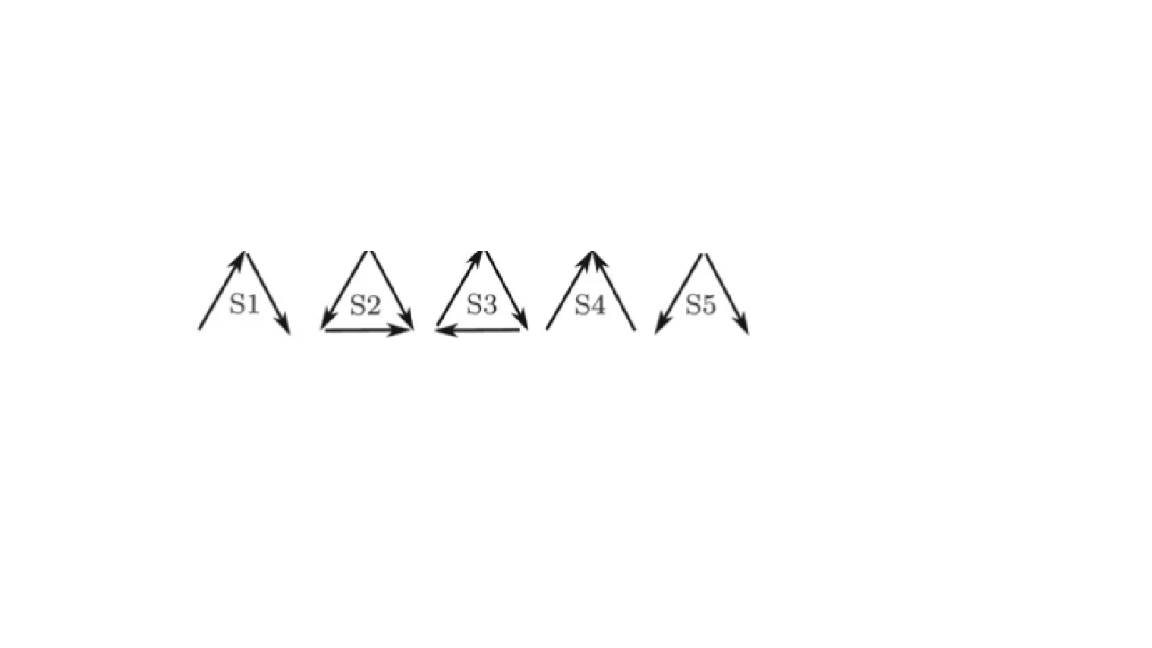

In [9]:
from IPython.display import Image
Image(filename='3-node-motif.png')

In [10]:
motifs = {
    'S1': nx.DiGraph([(1,2),(2,3)]),
    'S2': nx.DiGraph([(1,2),(1,3),(2,3)]),
    'S3': nx.DiGraph([(1,2),(2,3),(3,1)]),
    'S4': nx.DiGraph([(1,2),(3,2)]),
    'S5': nx.DiGraph([(1,2),(1,3)])
    }

In [11]:
mcounter(G, motifs)

NameError: name 'mcounter' is not defined

In [12]:
ans = {'S1': 239, 'S2': 113, 'S3': 9, 'S4': 289, 'S5': 202}

Text(0.5, 0, 'motif type')

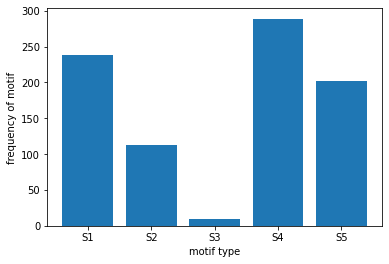

In [13]:
plt.bar(ans.keys(),ans.values())
plt.ylabel('frequency of motif')
plt.xlabel('motif type')

#### Degree Centrality

The degree centrality values are normalized by dividing by the maximum possible degree in a simple graph n-1 where n is the number of nodes in G.

For multigraphs or graphs with self loops the maximum degree might be higher than n-1 and values of degree centrality greater than 1 are possible.

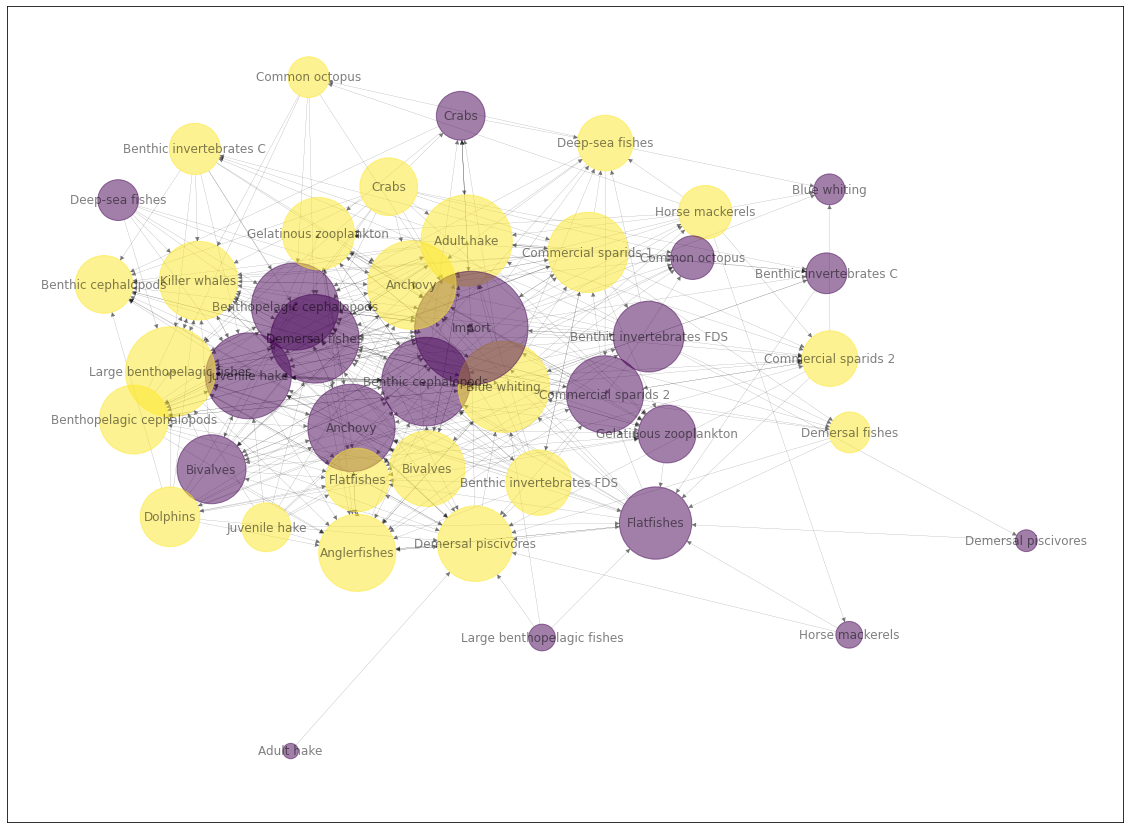

In [14]:
plt.figure(figsize=[20,15])
d = dict(nx.degree_centrality(G))

nx.draw_networkx(G, node_size=[v * 10000 for v in d.values()], pos=nx.kamada_kawai_layout(G),
                 node_color=node_colors, labels=label, alpha=0.5, width=0.2)

#### Betweenness Centrality

Degree centrality assigns an importance score based simply on the number of links held by each node.

It tells us: How many direct, ‘one hop’ connections each node has to other nodes in the network.

For finding very connected individuals, popular individuals, individuals who are likely to hold most information or individuals who can quickly connect with the wider network

 Degree centrality is the simplest measure of node connectivity. Sometimes it’s useful to look at in-degree (number of inbound links) and out-degree (number of outbound links) as distinct measures, for example when looking at transactional data or account activity.

In [15]:
clust_coeff = nx.clustering(G)
avg_clust = nx.average_clustering(G)

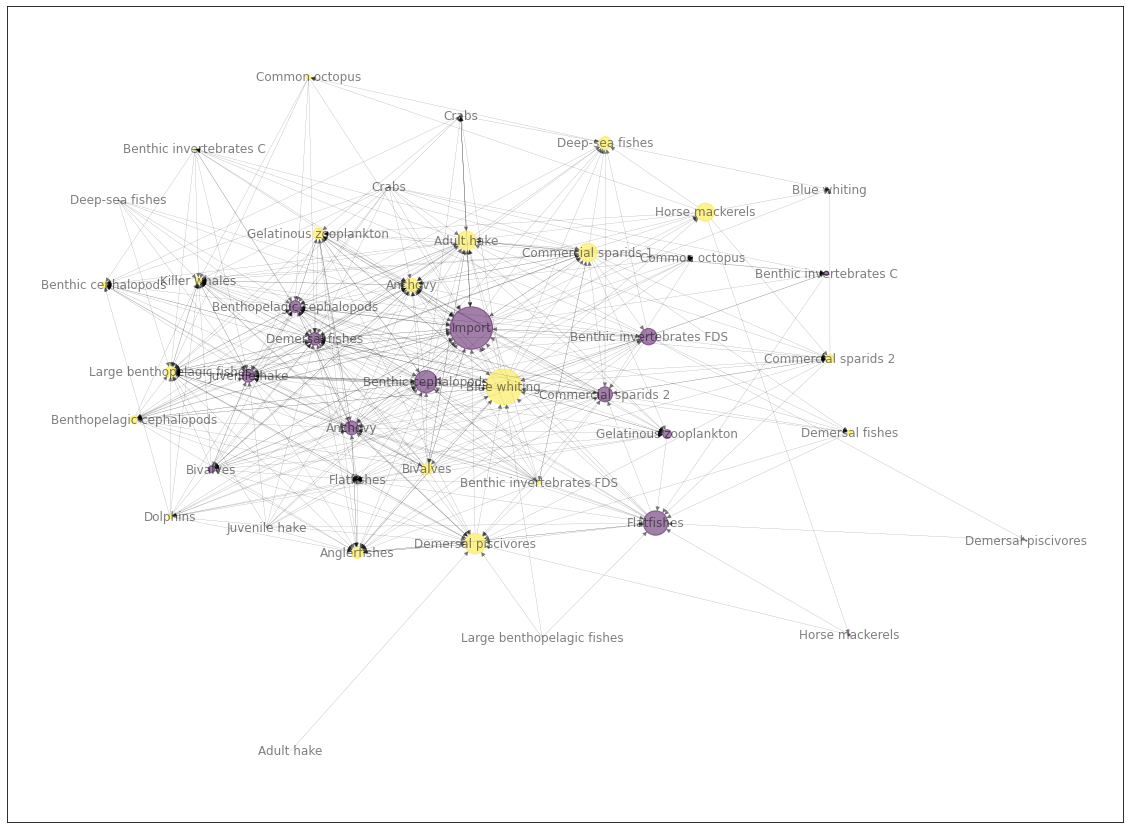

In [16]:
plt.figure(figsize=[20,15])
d = dict(nx.betweenness_centrality(G))

nx.draw_networkx(G, node_size=[v * 10000 for v in d.values()], pos=nx.kamada_kawai_layout(G),
                 node_color=node_colors, labels=label, alpha=0.5, width=0.2)

#### Eigenvector Cetrality

A natural extension of degree centrality is eigenvector centrality. In-degree centrality awards one centrality point for every link a node receives. But not all vertices are equivalent: some are more relevant than others, and, reasonably, endorsements from important nodes count more. The eigenvector centrality thesis reads:

A node is important if it is linked to by other important nodes.

Eigenvector centrality differs from in-degree centrality: a node receiving many links does not necessarily have a high eigenvector centrality (it might be that all linkers have low or null eigenvector centrality). Moreover, a node with high eigenvector centrality is not necessarily highly linked (the node might have few but important linkers).

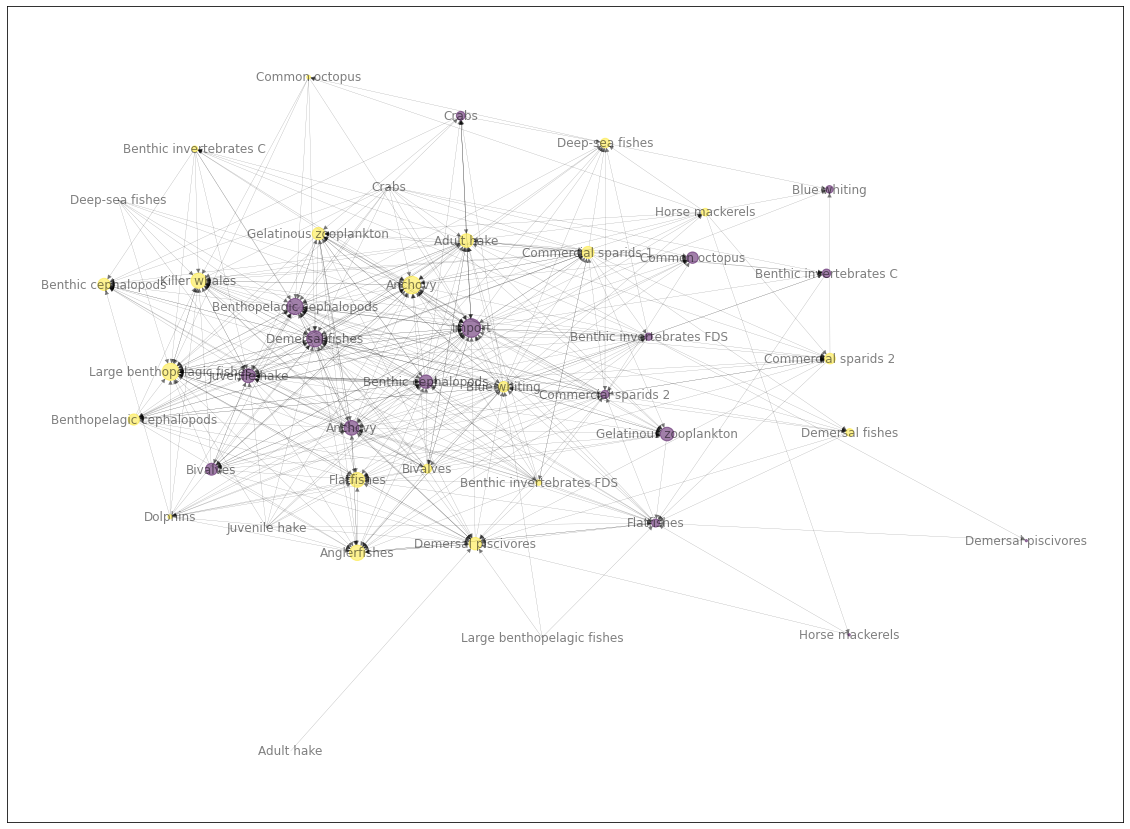

In [17]:
plt.figure(figsize=[20,15])
d = dict(nx.eigenvector_centrality(G))

nx.draw_networkx(G, node_size=[v * 1000 for v in d.values()], pos=nx.kamada_kawai_layout(G), 
                 alpha=0.5,node_color=node_colors,labels=label, width = 0.2)
plt.show()

### Closeness Centrality

Closeness centrality indicates how close a node is to all other nodes in the network. It is calculated as the average of the shortest path length from the node to every other node in the network. 

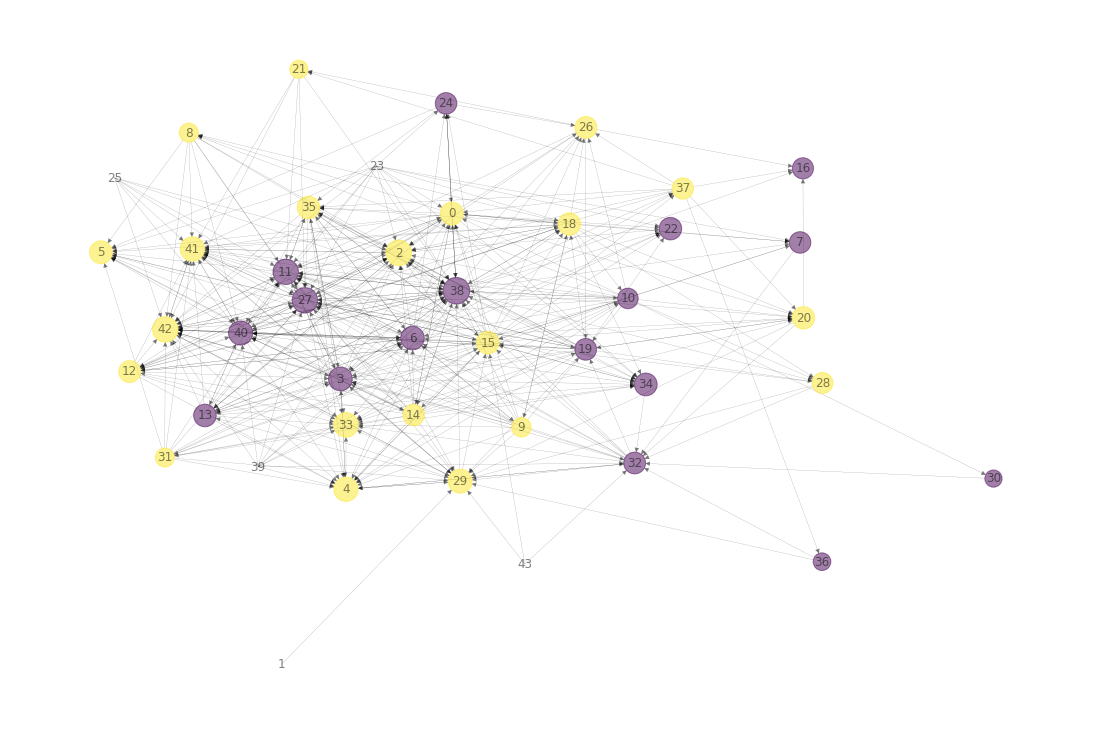

In [18]:
plt.figure(figsize=[15,10])
d = dict(nx.closeness_centrality(G))

nx.draw(G, node_size=[v * 1000 for v in d.values()], pos=nx.kamada_kawai_layout(G), alpha=0.5,node_color=node_colors,with_labels=True, width = 0.2)
plt.show()

### Community Detection and Analysis

Structures formed by groups of multiple nodes can beanalyzed by looking at what types of relationships the nodes (representing a species) are typically embeddedin (e.g.competition,intraguild predation - intraguildpredation is the killing and sometimes eating of potentialcompetitors. This interaction represents a combinationof predation and competition, because both species relyon the same prey resources and also benefit from preyingupon one another), by determining if there are nodes found in dense clusters or non-overlapping compartments,forming modular communities or using motif distribution.

In [105]:
hubs, authorities = nx.hits(G)

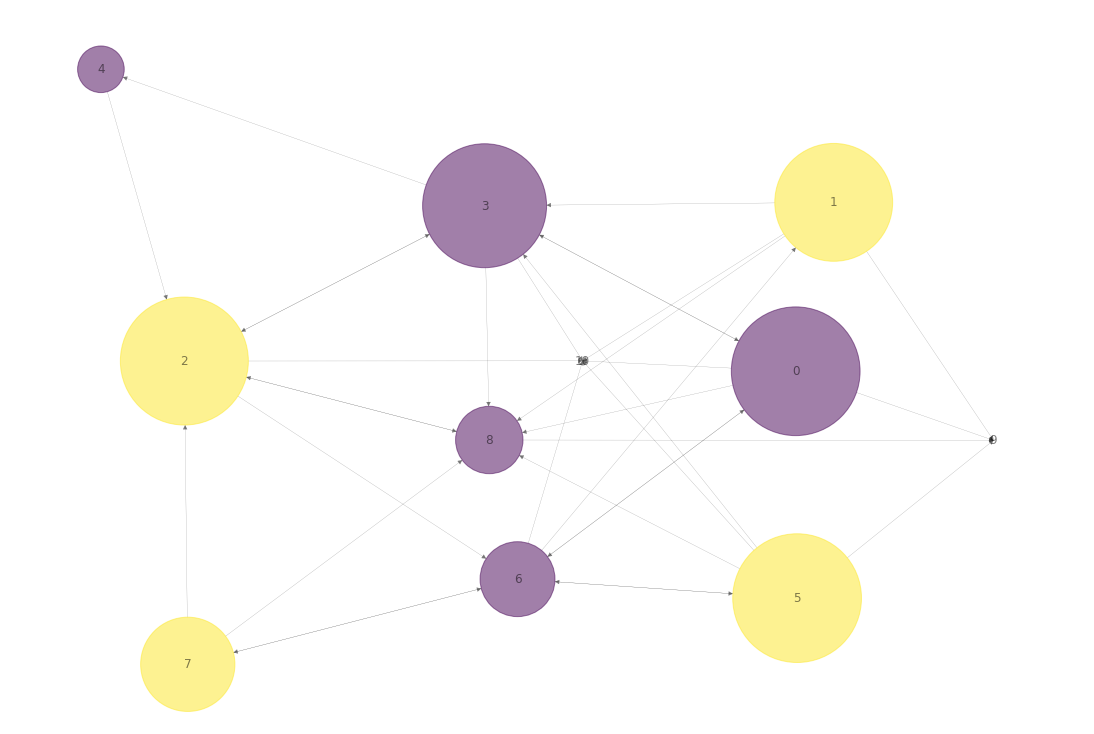

In [106]:
node_size=[100000*hubs[node] for node in hubs]
plt.figure(figsize=(15, 10))
nx.draw(G, nx.kamada_kawai_layout(G), alpha=0.5, with_labels=True, node_color=node_colors, node_size=node_size, width=0.2)
plt.show()

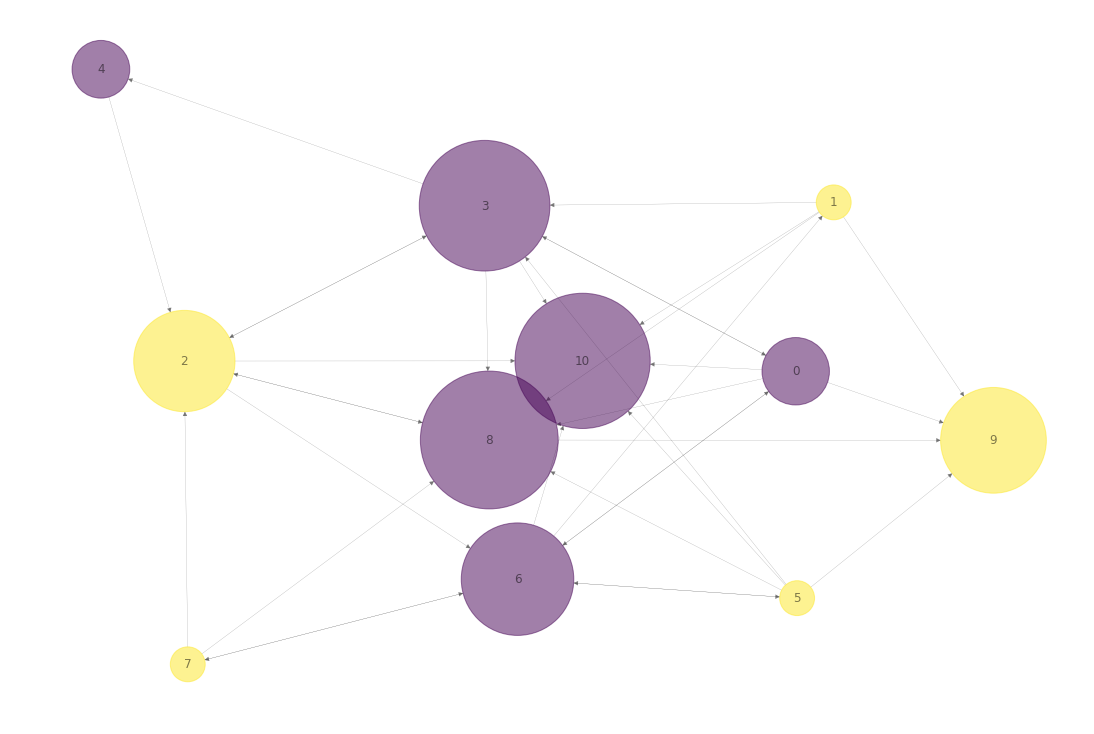

In [107]:
node_size=[100000*authorities[node] for node in authorities]
plt.figure(figsize=(15, 10))
nx.draw(G, nx.kamada_kawai_layout(G), alpha=0.5, with_labels=True, node_color=node_colors, node_size=node_size, width=0.2)
plt.show()

In [108]:
G1 = G.to_undirected()
partition = community.best_partition(G1)

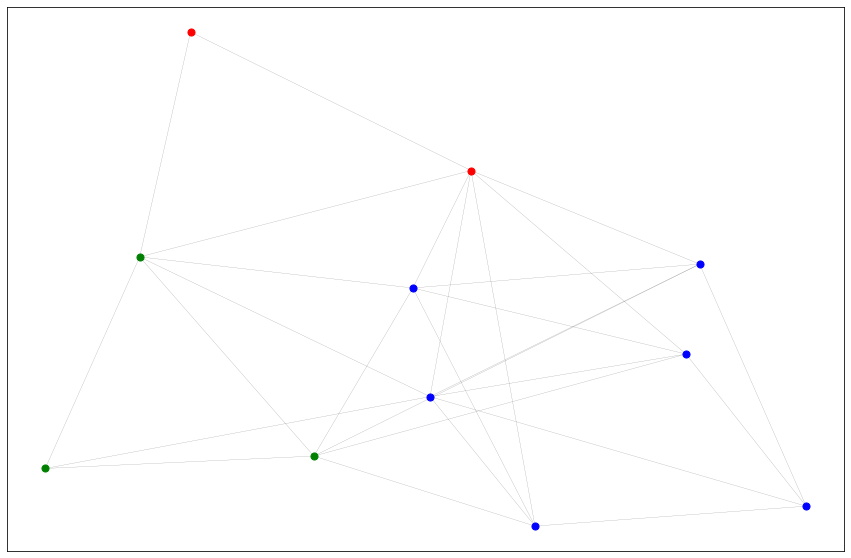

In [109]:
#drawing
size = float(len(set(partition.values())))
pos = nx.kamada_kawai_layout(G1)
count = 0
node_color = ['red','blue','green','yellow','orange']
plt.figure(figsize=(15,10))

for com in set(partition.values()) :
    count = count + 1
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G1, pos, list_nodes, node_size = 50, node_color = node_color[count-1], label=name)

nx.draw_networkx_edges(G1, pos, alpha=0.5, width=0.2)
plt.show()

In [110]:
list_nodes = []
names = []
groups = []
for com in set(partition.values()):
    temp = [nodes for nodes in partition.keys() if partition[nodes] == com]
    list_nodes.append(temp)
    names.append([name[int(nodes)] for nodes in temp])
    groups.append([group[int(nodes)] for nodes in temp])

In [111]:
list_nodes[0]

['3', '4']

In [112]:
for element in list_nodes[0]:
    print(list(G.predecessors(element)))

['0', '1', '2', '3', '5']
['3']


In [113]:
label = {}
node_color = []
for nodes in G1.nodes():
    label[nodes] = G1.nodes[nodes]['Specie']
    node_color.append(partition[nodes])

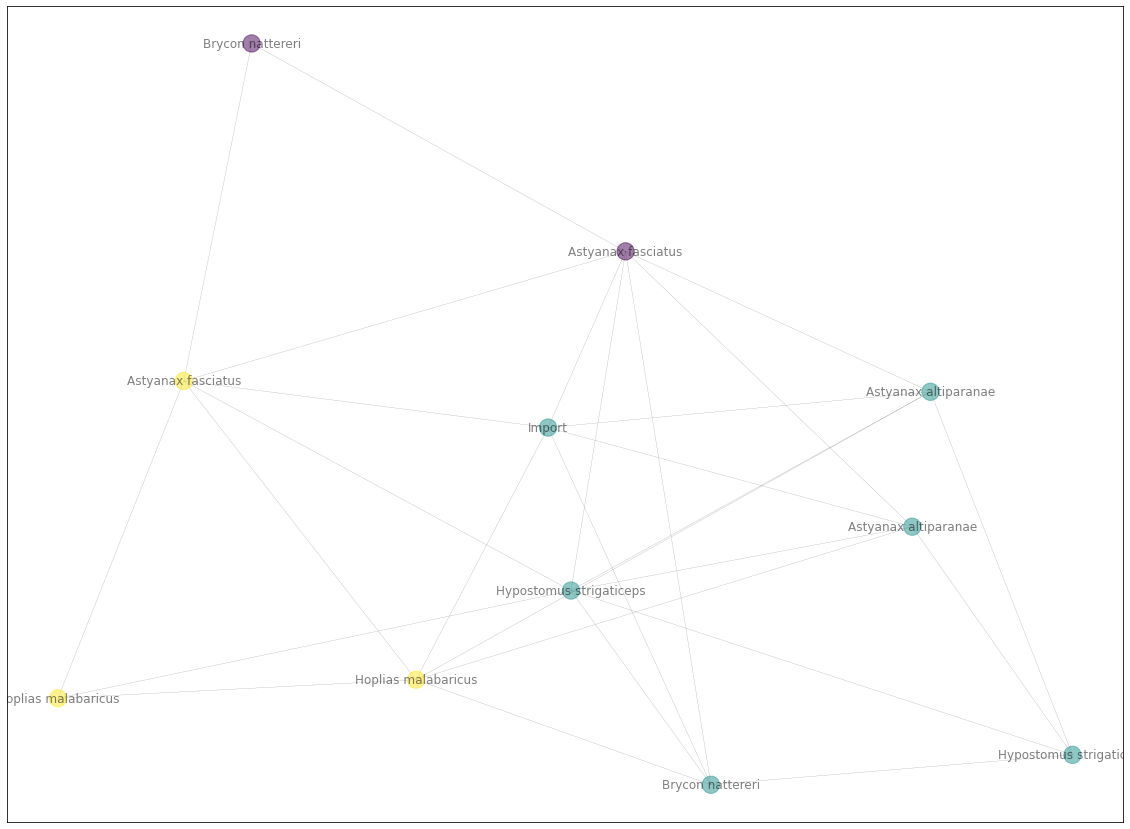

In [114]:
plt.figure(figsize=(20,15))
nx.draw_networkx(G1, pos = nx.kamada_kawai_layout(G1), node_color=node_color, labels=label, alpha=0.5,width=0.2)
plt.savefig('LV_02.png')

### Network community profile

In [29]:
G1 = G.to_undirected()
partition = community.best_partition(G1)

In [30]:
list_nodes = []
names = []
groups = []
for com in set(partition.values()):
    temp = [nodes for nodes in partition.keys() if partition[nodes] == com]
    list_nodes.append(temp)
    names.append([name[int(nodes)] for nodes in temp])
    groups.append([group[int(nodes)] for nodes in temp])

In [31]:
label = {}
node_color = []
for nodes in G1.nodes():
    label[nodes] = G1.nodes[nodes]['Specie']
    node_color.append(partition[nodes])

In [32]:
for element in list_nodes[0]:
    x = list(G.predecessors(element))
    print(x)
    
for element in list_nodes[1]:
    y = list(G.predecessors(element))
    print(y)
    
for element in list_nodes[2]:
    z= list(G.predecessors(element))
    print(z)
    
for element in list_nodes[3]:
    v= list(G.predecessors(element))
    print(v)

['3', '4', '9', '10', '11', '12', '13', '14', '19', '26', '29', '31', '32', '35', '38', '42']
['3', '4', '9', '10', '11', '12', '13', '14', '19', '31', '32', '35', '39', '40', '42']
['14', '18', '31', '38']
['0', '3', '6', '8', '9', '10', '11', '12', '13', '14', '15', '19', '21', '23', '25', '26', '29', '31', '32', '35', '38', '40', '42']
['0', '15', '38', '40']
['0', '3', '6', '8', '9', '10', '12', '13', '14', '15', '19', '21', '23', '25', '27', '31', '32', '35', '37', '38', '39', '40', '41', '42']
['0', '10', '18']
['0', '2', '6', '14', '15', '18', '38']
['0', '2', '6', '15', '19', '29', '38', '40']
[]
['0', '3', '6', '8', '12', '13', '14', '15', '18', '19', '23', '25', '32', '35', '38', '39', '41']
['0', '2', '3', '6', '8', '9', '10', '12', '13', '14', '15', '18', '19', '21', '23', '25', '27', '31', '40', '42']
['14', '15']
['0', '3', '6', '8', '9', '10', '11', '12', '13', '14', '15', '19', '21', '23', '25', '27', '29', '31', '35', '38', '39', '40', '41', '42']
['0', '3', '6', '9', 

In [33]:
number_k = (x,y,z,v)
number_k

(['0',
  '3',
  '6',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '19',
  '21',
  '23',
  '25',
  '27',
  '29',
  '31',
  '35',
  '38',
  '39',
  '40',
  '41',
  '42'],
 ['0', '2', '3', '6', '15', '19', '23', '38'],
 ['20', '26', '37', '38'],
 ['4',
  '9',
  '10',
  '12',
  '13',
  '14',
  '15',
  '19',
  '27',
  '29',
  '31',
  '32',
  '35',
  '38',
  '39',
  '40',
  '42'])

In [34]:
from cdlib.algorithms import louvain
from cdlib import evaluation
communities = louvain(G1)
mod = evaluation.conductance(G1,communities)
conductance = list(mod)
conductance

Note: to be able to use all crisp methods, you need to install some additional packages:  {'leidenalg', 'wurlitzer', 'infomap', 'karateclub', 'graph_tool'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'karateclub', 'ASLPAw'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'infomap', 'leidenalg', 'wurlitzer'}


[0.5043478260869565,
 0.7543859649122807,
 0.614722350686981,
 0.11017032151803809]

Text(0.5, 1.0, 'NCP plot')

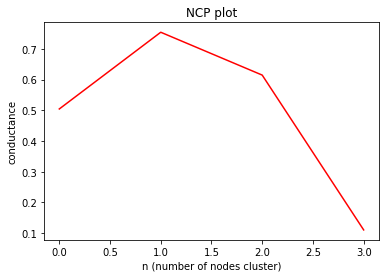

In [35]:
plt.plot(conductance, 'r')
plt.xlabel('n (number of nodes cluster)')
plt.ylabel('conductance')
#plt.xscale("log")
#plt.yscale("log")
plt.title('NCP plot')

In [36]:
conduct1 = nx.conductance(G1, x, x)
conduct2 = nx.conductance(G1, y, y)
conduct3 = nx.conductance(G1, z, z)
conduct4 = nx.conductance(G1, v, v)

conductancex = (conduct1, conduct2, conduct3, conduct4)
conductancex

(0.34959349593495936,
 0.11162790697674418,
 0.07792207792207792,
 0.26229508196721313)

In [37]:
plt.plot(number_n, conductancex, 'r')
plt.xlabel('n (number of nodes cluster)')
plt.ylabel('conductance')
#plt.xscale("log")
#plt.yscale("log")
plt.title('NCP plot')

NameError: name 'number_n' is not defined